In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
sns.set()

In [2]:
data_raw = pd.read_csv("KaggleV2-May-2016.csv")

In [3]:
data_raw.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data_raw.describe(include="all")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [5]:
data_raw["AppointmentID"].nunique()

110527

## find days to Appointment

In [6]:
data_diferencedays = data_raw.copy()
data_diferencedays["ScheduledDayDATEFORMAT"] = (data_diferencedays["ScheduledDay"])
data_diferencedays["ScheduledDayDATEFORMAT"] = pd.to_datetime(data_diferencedays.ScheduledDayDATEFORMAT)
data_diferencedays["AppointmentDayDATEFORMAT"] = (data_diferencedays["AppointmentDay"])
data_diferencedays["AppointmentDayDATEFORMAT"] = pd.to_datetime(data_diferencedays.AppointmentDayDATEFORMAT)
data_diferencedays["DaysToAppointment"] = (data_diferencedays["AppointmentDayDATEFORMAT"] - data_diferencedays["ScheduledDayDATEFORMAT"]).dt.days
data_diferencedays.loc[data_diferencedays.DaysToAppointment < 0, 'DaysToAppointment'] = 0
data_diferencedays.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDayDATEFORMAT,AppointmentDayDATEFORMAT,DaysToAppointment
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0


## Whats day of week was the appointment:

In [7]:
data_weekname = data_diferencedays.copy()

In [8]:
data_weekname["WeekName"] = data_weekname["AppointmentDayDATEFORMAT"].dt.weekday_name
data_weekname["Month"] = data_weekname["AppointmentDayDATEFORMAT"].dt.month_name()

In [9]:
data_weekname.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDayDATEFORMAT,AppointmentDayDATEFORMAT,DaysToAppointment,WeekName,Month
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,Friday,April
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,Friday,April
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,Friday,April
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,Friday,April
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,Friday,April


## Create binary to GENDER and No-Show 

In [10]:
data_toBinary = data_weekname.copy()
data_toBinary["No-show"] = data_toBinary["No-show"].map({"No":0, "Yes":1})
data_toBinary["Gender"] = data_toBinary["Gender"].map({"F":1, "M":0})
data_toBinary.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDayDATEFORMAT,AppointmentDayDATEFORMAT,DaysToAppointment,WeekName,Month
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,Friday,April
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,Friday,April
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,Friday,April
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,Friday,April
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,Friday,April


## Creating Dummies to Neighbourhood, weekname and month

In [11]:
data_w_dummies = pd.get_dummies(data_toBinary, columns=["Neighbourhood","WeekName","Month"],drop_first=True)
data_w_dummies.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,...,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,WeekName_Monday,WeekName_Saturday,WeekName_Thursday,WeekName_Tuesday,WeekName_Wednesday,Month_June,Month_May
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data_w_dummies.columns.values

array(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'ScheduledDayDATEFORMAT', 'AppointmentDayDATEFORMAT',
       'DaysToAppointment', 'Neighbourhood_ANDORINHAS',
       'Neighbourhood_ANTÔNIO HONÓRIO',
       'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhood_DO QUADRO',
       'Neighbourhood_ENSEADA DO SUÁ', 'Neighbourhood_ESTRELINHA',
       'Neighbourhood_FONTE GRANDE', 'Nei

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_w_dummies[['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received',
       'DaysToAppointment', 'Neighbourhood_ANDORINHAS',
       'Neighbourhood_ANTÔNIO HONÓRIO',
       'Neighbourhood_ARIOVALDO FAVALESSA',
       'Neighbourhood_BARRO VERMELHO', 'Neighbourhood_BELA VISTA',
       'Neighbourhood_BENTO FERREIRA', 'Neighbourhood_BOA VISTA',
       'Neighbourhood_BONFIM', 'Neighbourhood_CARATOÍRA',
       'Neighbourhood_CENTRO', 'Neighbourhood_COMDUSA',
       'Neighbourhood_CONQUISTA', 'Neighbourhood_CONSOLAÇÃO',
       'Neighbourhood_CRUZAMENTO', 'Neighbourhood_DA PENHA',
       'Neighbourhood_DE LOURDES', 'Neighbourhood_DO CABRAL',
       'Neighbourhood_DO MOSCOSO', 'Neighbourhood_DO QUADRO',
       'Neighbourhood_ENSEADA DO SUÁ', 'Neighbourhood_ESTRELINHA',
       'Neighbourhood_FONTE GRANDE', 'Neighbourhood_FORTE SÃO JOÃO',
       'Neighbourhood_FRADINHOS', 'Neighbourhood_GOIABEIRAS',
       'Neighbourhood_GRANDE VITÓRIA', 'Neighbourhood_GURIGICA',
       'Neighbourhood_HORTO', 'Neighbourhood_ILHA DAS CAIEIRAS',
       'Neighbourhood_ILHA DE SANTA MARIA', 'Neighbourhood_ILHA DO BOI',
       'Neighbourhood_ILHA DO FRADE', 'Neighbourhood_ILHA DO PRÍNCIPE',
       'Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE',
       'Neighbourhood_INHANGUETÁ', 'Neighbourhood_ITARARÉ',
       'Neighbourhood_JABOUR', 'Neighbourhood_JARDIM CAMBURI',
       'Neighbourhood_JARDIM DA PENHA', 'Neighbourhood_JESUS DE NAZARETH',
       'Neighbourhood_JOANA D´ARC', 'Neighbourhood_JUCUTUQUARA',
       'Neighbourhood_MARIA ORTIZ', 'Neighbourhood_MARUÍPE',
       'Neighbourhood_MATA DA PRAIA', 'Neighbourhood_MONTE BELO',
       'Neighbourhood_MORADA DE CAMBURI', 'Neighbourhood_MÁRIO CYPRESTE',
       'Neighbourhood_NAZARETH', 'Neighbourhood_NOVA PALESTINA',
       'Neighbourhood_PARQUE INDUSTRIAL', 'Neighbourhood_PARQUE MOSCOSO',
       'Neighbourhood_PIEDADE', 'Neighbourhood_PONTAL DE CAMBURI',
       'Neighbourhood_PRAIA DO CANTO', 'Neighbourhood_PRAIA DO SUÁ',
       'Neighbourhood_REDENÇÃO', 'Neighbourhood_REPÚBLICA',
       'Neighbourhood_RESISTÊNCIA', 'Neighbourhood_ROMÃO',
       'Neighbourhood_SANTA CECÍLIA', 'Neighbourhood_SANTA CLARA',
       'Neighbourhood_SANTA HELENA', 'Neighbourhood_SANTA LUÍZA',
       'Neighbourhood_SANTA LÚCIA', 'Neighbourhood_SANTA MARTHA',
       'Neighbourhood_SANTA TEREZA', 'Neighbourhood_SANTO ANDRÉ',
       'Neighbourhood_SANTO ANTÔNIO', 'Neighbourhood_SANTOS DUMONT',
       'Neighbourhood_SANTOS REIS', 'Neighbourhood_SEGURANÇA DO LAR',
       'Neighbourhood_SOLON BORGES', 'Neighbourhood_SÃO BENEDITO',
       'Neighbourhood_SÃO CRISTÓVÃO', 'Neighbourhood_SÃO JOSÉ',
       'Neighbourhood_SÃO PEDRO', 'Neighbourhood_TABUAZEIRO',
       'Neighbourhood_UNIVERSITÁRIO', 'Neighbourhood_VILA RUBIM',
       'WeekName_Monday', 'WeekName_Saturday', 'WeekName_Thursday',
       'WeekName_Tuesday', 'WeekName_Wednesday', 'Month_June',
       'Month_May']]
vif = pd.DataFrame()
vif ["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,2.999868,Gender
1,5.324410,Age
2,1.193646,Scholarship
3,2.022211,Hipertension
4,1.348049,Diabetes
...,...,...
91,2.108311,WeekName_Thursday
92,2.716085,WeekName_Tuesday
93,2.684952,WeekName_Wednesday
94,10.617958,Month_June


### Finding TARGET and Inputs data

In [24]:
data2 = data_w_dummies.copy()
data2

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,...,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,WeekName_Monday,WeekName_Saturday,WeekName_Thursday,WeekName_Tuesday,WeekName_Wednesday,Month_June,Month_May
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,1,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
110523,3.596266e+12,5650093,1,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
110524,1.557663e+13,5630692,1,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
110525,9.213493e+13,5630323,1,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [25]:
target = data2["No-show"]
inputs = data2.drop(['No-show','PatientId', 'AppointmentID', 'ScheduledDay'
                     ,'AppointmentDay','ScheduledDayDATEFORMAT', 'AppointmentDayDATEFORMAT',
                     'Month_May','Month_June'], axis=1)
#inputs = data2[['Age',"Gender"]]
#test = pd.read_csv("Teste.csv")
#train = pd.read_csv("train.csv")
target

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: No-show, Length: 110527, dtype: int64

### Split data in train and test

In [26]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=45)

### Plot of Age vs No-Show

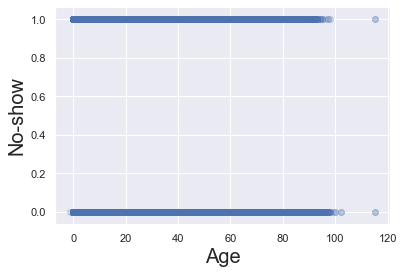

In [27]:
plt.scatter(x_train['Age'],y_train,color='C0',  alpha=0.2)
plt.xlabel("Age", fontsize=20)
plt.ylabel('No-show', fontsize=20)
plt.show()

In [28]:
inputs_train = sm.add_constant(x_train)
reg_log = sm.Logit(y_train,inputs_train)
results_log = reg_log.fit(maxiter=300, method='bfgs')
results_log.summary()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.480172
         Iterations: 223
         Function evaluations: 227
         Gradient evaluations: 227


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                No-show   No. Observations:                77368
Model:                          Logit   Df Residuals:                    77274
Method:                           MLE   Df Model:                           93
Date:                Mon, 25 Nov 2019   Pseudo R-squ.:                 0.04450
Time:                        09:00:46   Log-Likelihood:                -37150.
converged:                       True   LL-Null:                       -38880.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -1.4739        nan        nan        nan         nan         nan
Gender                                        0.0146        nan        nan        nan         nan         nan
Age                                          -0.0070        nan        nan        nan         nan         nan
Scholarship                                   0.2114        nan        nan        nan         nan         nan
Hipertension                                 -0.0973        nan        nan        nan         nan         nan
Diabetes                                      0.0944        nan        nan        nan         nan         nan
Alcoholism                                    0.1687        nan        nan        nan         nan         nan
Handcap                                       0.0281        nan        nan        nan         nan         nan
SMS_received                                  0.3610        nan        nan        nan         nan         nan
DaysToAppointment                             0.0246        nan        nan        nan         nan         nan
Neighbourhood_ANDORINHAS                      0.2177        nan        nan        nan         nan         nan
Neighbourhood_ANTÔNIO HONÓRIO                -0.1683        nan        nan        nan         nan         nan
Neighbourhood_ARIOVALDO FAVALESSA             0.2012        nan        nan        nan         nan         nan
Neighbourhood_BARRO VERMELHO                  0.2606        nan        nan        nan         nan         nan
Neighbourhood_BELA VISTA                      0.0580        nan        nan        nan         nan         nan
Neighbourhood_BENTO FERREIRA                  0.1486        nan        nan        nan         nan         nan
Neighbourhood_BOA VISTA                      -0.0300        nan        nan        nan         nan         nan
Neighbourhood_BONFIM                         -0.0217        nan        nan        nan         nan         nan
Neighbourhood_CARATOÍRA                       0.1657        nan        nan        nan         nan         nan
Neighbourhood_CENTRO                          0.1023        nan        nan        nan         nan         nan
Neighbourhood_COMDUSA                        -0.0291        nan        nan        nan         nan         nan
Neighbourhood_CONQUISTA                       0.0356        nan        nan        nan         nan         nan
Neighbourhood_CONSOLAÇÃO                     -0.1067        nan        nan        nan         nan         nan
Neighbourhood_CRUZAMENTO                     -0.0468        nan        nan        nan         nan         nan
Neighbourhood_DA PENHA                        0.0910        nan        nan        nan         nan         nan
Neighbourhood_DE LOURDES                     -0.2312        nan        nan        nan         nan         nan
Neighbourhood_DO CABRAL                      -0.469

In [37]:
np.set_printoptions(formatter={"float": lambda x:"{0:0.2f}".format(x)})
results_log.predict()

array([0.12, 0.17, 0.13, ..., 0.13, 0.45, 0.21])

In [38]:
np.array(data2["No-show"])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
results_log.pred_table()

array([[61312.00, 463.00],
       [15358.00, 235.00]])

### Table of results - Confunsion Matrix

In [40]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ["Predicted 0", "Predicted 1"]
cm_df = cm_df.rename(index={0:"Actual 0", 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,61312.0,463.0
Actual 1,15358.0,235.0


### Results of Confusion Matrix --- Model's accuracy

In [41]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.7955097714817495

In [42]:
len(x_train.columns.values)

96

In [43]:
def confusion_matrix(data,actual_values,model):
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [55]:
confusion_matrix(x_test, y_test, results_log)


ValueError: shapes (33159,96) and (97,) not aligned: 96 (dim 1) != 97 (dim 0)

In [49]:
results_log.predict(x_test.reshape(-1,1))

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [66]:
x_test

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DaysToAppointment,Neighbourhood_ANDORINHAS,...,Neighbourhood_TABUAZEIRO,Neighbourhood_UNIVERSITÁRIO,Neighbourhood_VILA RUBIM,WeekName_Monday,WeekName_Saturday,WeekName_Thursday,WeekName_Tuesday,WeekName_Wednesday,Month_June,Month_May
101750,1,32,0,0,0,0,0,1,11,0,...,0,0,0,0,0,0,0,1,1,0
100173,0,66,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
32340,1,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
101522,0,63,0,0,0,1,0,1,5,0,...,0,0,0,0,0,0,0,1,1,0
71327,0,27,0,0,0,0,0,1,28,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106827,1,56,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
52351,1,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
36624,0,9,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
59737,1,52,0,0,0,0,0,0,25,0,...,0,0,0,1,0,0,0,0,0,1
